# Ch 5.1 Multiple Linear Regression

In [4]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import arviz
import cmdstanpy
import statsmodels.api as sm
import math
from scipy import stats

In [2]:
import os, sys

os.chdir('../../chap05')
print("Current working directory:", os.getcwd())

Current working directory: c:\git\Matsuura2022_Bayesian_Statistical_Modeling_with_Stan_R_and_Python\chap05


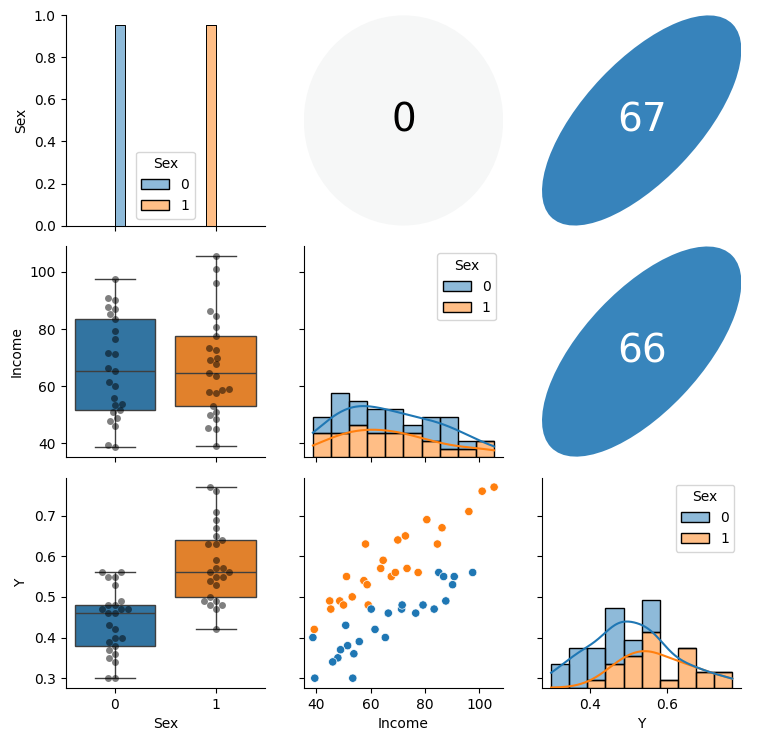

In [8]:
d = pandas.read_csv('input/data-shopping-1.csv')
d.drop(columns='PersonID', inplace=True)

def plot_lower(x, y, **kws):
    d_ = pandas.DataFrame({'x':x, 'y':y, 'Sex':d.Sex})
    if x.nunique() < 5:
        sns.boxplot(data=d_, x='x', y='y', hue='Sex')
        sns.swarmplot(data=d_, x='x', y='y', color='black', alpha=0.5)
    else:
        sns.scatterplot(data=d_, x='x', y='y', hue='Sex')

def plot_diag(x, **kws):    
    d_ = pandas.DataFrame({'x':x, 'Sex':d.Sex})
    sns.histplot(data=d_, x='x', hue='Sex', multiple='stack', kde=True, bins=10)

def plot_upper(x, y, **kws):
    from matplotlib.patches import Ellipse
    r, _ = stats.spearmanr(x, y)
    ax = plt.gca()
    ax.axis('off')
    ellcolor = plt.cm.RdBu(0.5*(r+1))
    txtcolor = 'black' if math.fabs(r) < 0.5 else 'white'
    ax.add_artist(Ellipse(xy=[.5, .5], width=math.sqrt(1+r), height=math.sqrt(1-r), angle=45,
        facecolor=ellcolor, edgecolor='none', transform=ax.transAxes))
    ax.text(.5, .5, '{:.0f}'.format(r*100), color=txtcolor, fontsize=28,
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

g = sns.PairGrid(d)
g.map_lower(plot_lower)
g.map_diag(plot_diag)
g.map_upper(plot_upper)
g.add_legend();

### Theoretical Explanation of the p-value for Spearman's Correlation Coefficient

The p-value associated with the Spearman correlation coefficient is a crucial statistical measure that helps you determine the significance of the correlation between two variables. It provides a way to assess whether the observed monotonic relationship is likely to exist in the overall population or if it's just a result of random chance in your sample.

#### 1. The Null and Alternative Hypotheses
To understand the p-value, we first need to define the hypotheses:

- Null Hypothesis (H₀): This hypothesis states that there is no monotonic relationship between the two variables in the population. In other words, the true Spearman correlation coefficient (ρ) is zero.

H₀: ρ = 0

- Alternative Hypothesis (H₁): This hypothesis proposes that there is a monotonic relationship between the two variables. This means the Spearman correlation coefficient (ρ) is not zero. It can be a two-sided test (ρ ≠ 0) or a one-sided test (ρ > 0 or ρ < 0).

H₁: ρ ≠ 0

#### 2. What the p-value Represents
The p-value is the probability of observing a Spearman correlation coefficient as extreme as, or more extreme than, the one computed from your sample data, assuming that the null hypothesis is true.

- A small p-value suggests that it is very unlikely you would observe such a strong correlation if there were no actual relationship between the variables. This gives you a reason to doubt the null hypothesis.
- A large p-value suggests that the observed correlation could have easily occurred by random chance, so there is no strong reason to reject the null hypothesis.

#### 3. Interpreting the p-value
To make a decision, you compare the p-value to a pre-determined significance level (α), which is typically set to 0.05 (or 5%).

- If p-value < α (e.g., p < 0.05):
You reject the null hypothesis.
You conclude that the correlation is statistically significant.
This means there is strong evidence for a monotonic relationship between the two variables.
- If p-value ≥ α (e.g., p ≥ 0.05):
You fail to reject the null hypothesis.
You conclude that the correlation is not statistically significant.
This means there is not enough evidence to say that a monotonic relationship exists between the variables.

#### 4. How the p-value is Calculated
The calculation of the p-value depends on the sample size:

For small sample sizes, the exact p-value is often calculated using permutation tests, which consider all possible orderings of the data ranks.

For larger sample sizes (typically n > 20), the distribution of the Spearman correlation coefficient can be approximated by a t-distribution. The test statistic t is calculated as follows:

<img alt="t-statistic formula" src="https://latex.codecogs.com/svg.latex?t = r_s \sqrt{\frac{n-2}{1-r_s^2}}">
where:

- `r_s` is the sample Spearman correlation coefficient.
- `n` is the sample size.
This t-statistic follows a t-distribution with n-2 degrees of freedom. The p-value is then determined from this distribution.

In summary, the p-value provides a formal way to test the significance of a Spearman correlation, helping you distinguish between a meaningful relationship and one that could be due to random sampling variability.

#### Correlation Coefficients
1. Pearson Correlation
   $$
        r_p = \sum_i (X_i - {\bar X})(Y_i - {\bar Y}) / std(X) std(Y)
   $$
2. Spearman's (Rank) Correlation
   $$
         rank_X = sort\_index(X) \\
         rank_Y = sort\_index(Y) \\
         r_s = PersonCorrelation(rank_X, rank_Y)
   $$

In [16]:
np.random.seed(123)
X = np.random.randint(100, size=5)
Y = np.random.randint(100, size=5)
print(X, Y)

def pearsonr(X,Y):
    mx = X.mean()
    my = Y.mean()
    r = ((X - mx) * (Y - my)).mean() / (X.std() * Y.std())
    return r

print("Pearson R:", pearsonr(X,Y))
print(stats.pearsonr(X,Y))

def spearmanr(X,Y):
    rankX = np.argsort(X)
    rankY = np.argsort(Y)
    return pearsonr(rankX, rankY)

print("Spearman R:", spearmanr(X,Y))
print(stats.spearmanr(X,Y))

[66 92 98 17 83] [57 86 97 96 47]
Pearson R: -0.18440598378545028
PearsonRResult(statistic=np.float64(-0.1844059837854502), pvalue=np.float64(0.7665445921819646))
Spearman R: 0.29999999999999993
SignificanceResult(statistic=np.float64(0.3), pvalue=np.float64(0.6238376647810728))
